In [1]:
import datetime as dt
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

In [2]:
f=xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05')
f

<xarray.Dataset>
Dimensions:                       (depth: 40, gridX: 398, gridY: 898, time: 123528)
Coordinates:
  * time                          (time) datetime64[ns] 2007-01-01T00:30:00 ....
  * depth                         (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                         (gridY) int16 0 1 2 3 4 ... 894 895 896 897
  * gridX                         (gridX) int16 0 1 2 3 4 ... 394 395 396 397
Data variables:
    ammonium                      (time, depth, gridY, gridX) float32 ...
    biogenic_silicon              (time, depth, gridY, gridX) float32 ...
    ciliates                      (time, depth, gridY, gridX) float32 ...
    diatoms                       (time, depth, gridY, gridX) float32 ...
    dissolved_organic_nitrogen    (time, depth, gridY, gridX) float32 ...
    flagellates                   (time, depth, gridY, gridX) float32 ...
    mesozooplankton               (time, depth, gridY, gridX) float32 ...
    microzooplankton              (time, depth, gridY, gridX) float32 ...
    nitrate                       (time, depth, gridY, gridX) float32 ...
    particulate_organic_nitrogen  (time, depth, gridY, gridX) float32 ...
    silicon                       (time, depth, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada
    cdm_data_type:             Grid
    comment:                   If you use this dataset in your research,\nple...
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             sallen@eoas.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https://salishsea-meopar-docs.readthedocs.io/
    description:               biogeochemical variables
    drawLandMask:              over
    history:                   2021-02-03T23:09:29Z (local files)\n2021-02-03...
    infoUrl:                   https://salishsea-meopar-docs.readthedocs.io/e...
    institution:               UBC EOAS
    institution_fullname:      Earth, Ocean & Atmospheric Sciences, Universit...
    keywords:                  ammonia, ammonium, aquatic, biogenic, biogenic...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The Salish Sea MEOPAR NEMO model results are c...
    project:                   Salish Sea MEOPAR NEMO Model
    sourceUrl:                 (local files)
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Green, Salish Sea, 3d Biology Fields, Hourly, ...
    testOutOfDate:             now-16hours
    time_coverage_end:         2021-02-02T23:30:00Z
    time_coverage_start:       2007-01-01T00:30:00Z
    timeStamp:                 2021-Feb-02 17:14:23 GMT
    title:                     Green, Salish Sea, 3d Biology Fields, Hourly, ...
    uuid:                      8be37b3d-0482-4af5-9949-87d2c6467b57

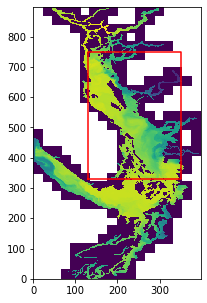

In [3]:
i0=130;i1=350
j0=330;j1=750
fig,ax=plt.subplots(1,1,figsize=(3,5))
ax.pcolormesh(f.variables['nitrate'][0,0,:,:])
ax.plot((i0,i1,i1,i0,i0),(j0,j0,j1,j1,j0),'r-')
f.close()

July 1


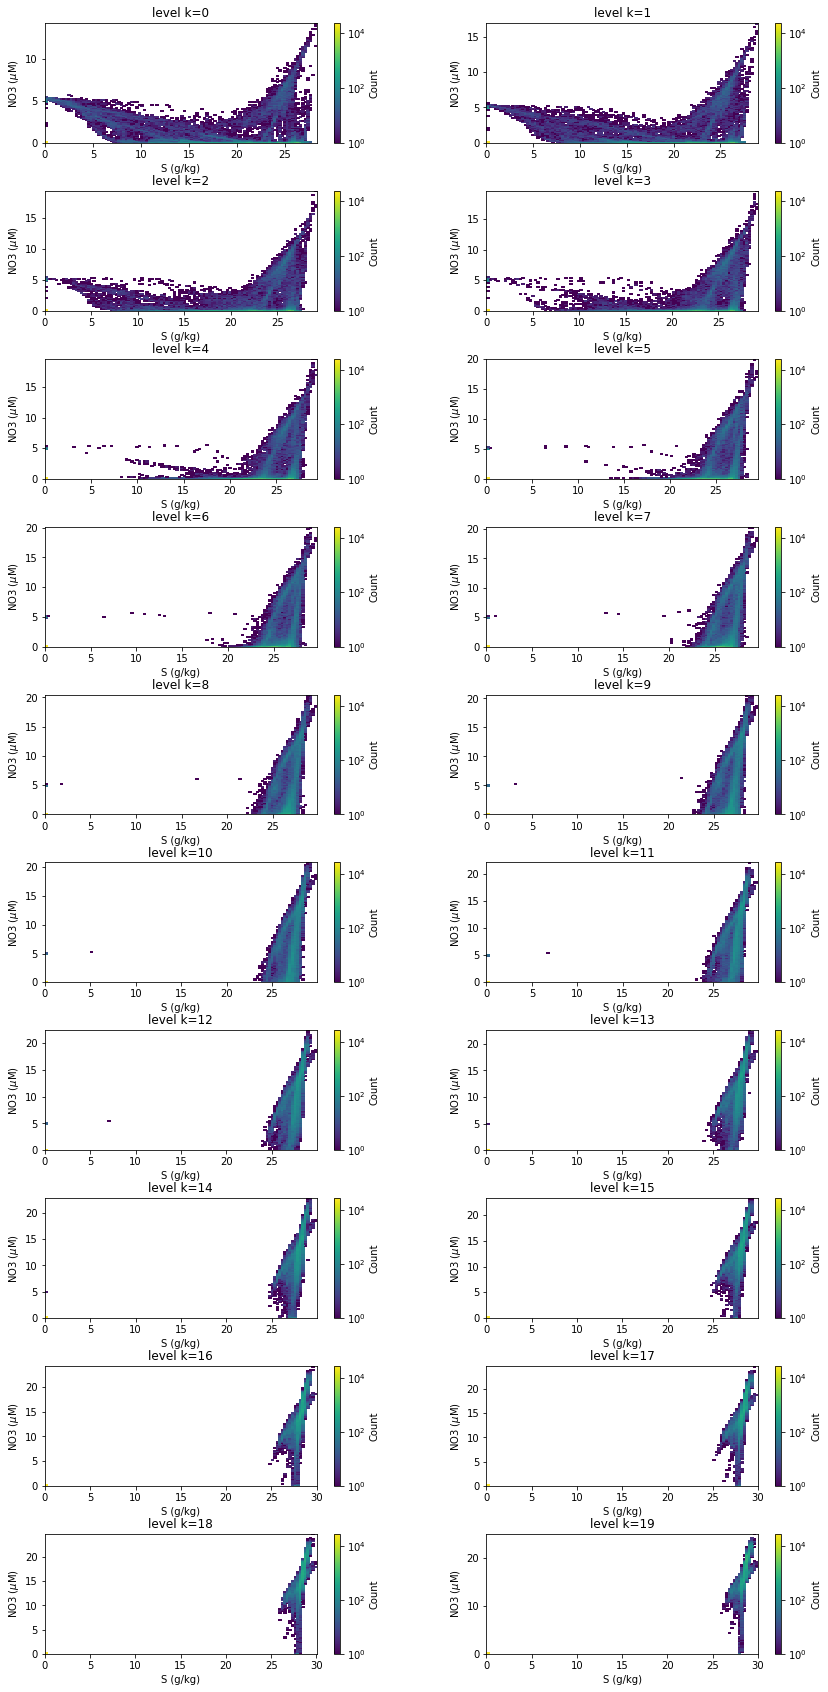

In [4]:
fig,ax=plt.subplots(10,2,figsize=(14,30))
fig.subplots_adjust(hspace=.4,wspace=.3)
ax=ax.flatten()
time=dt.datetime(2017,7,1,0,30)
with xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05') as f:
    with xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV19-05') as fT:
        for k in range(0,20):
            sal=np.array(fT.salinity.sel(time=dt.datetime(2017,7,1,0,30)).\
                         isel(depth=k,gridY=slice(j0,j1),gridX=slice(i0,i1)).values).flatten()
            no3=np.array(f.nitrate.sel(time=time).\
                         isel(depth=k,gridY=slice(j0,j1),gridX=slice(i0,i1)).values).flatten()
            counts, xedges, yedges, m1=ax[k].hist2d(sal[~np.isnan(sal)&~np.isnan(no3)],
                                                    no3[~np.isnan(sal)&~np.isnan(no3)],
                                                    bins=36*3,norm=LogNorm())
            cb=fig.colorbar(m1,ax=ax[k])
            cb.set_label('Count')
            ax[k].set_title('level k='+str(k))
            ax[k].set_xlabel('S (g/kg)')
            ax[k].set_ylabel('NO3 ($\mu$M)')
print('July 1')

March 1


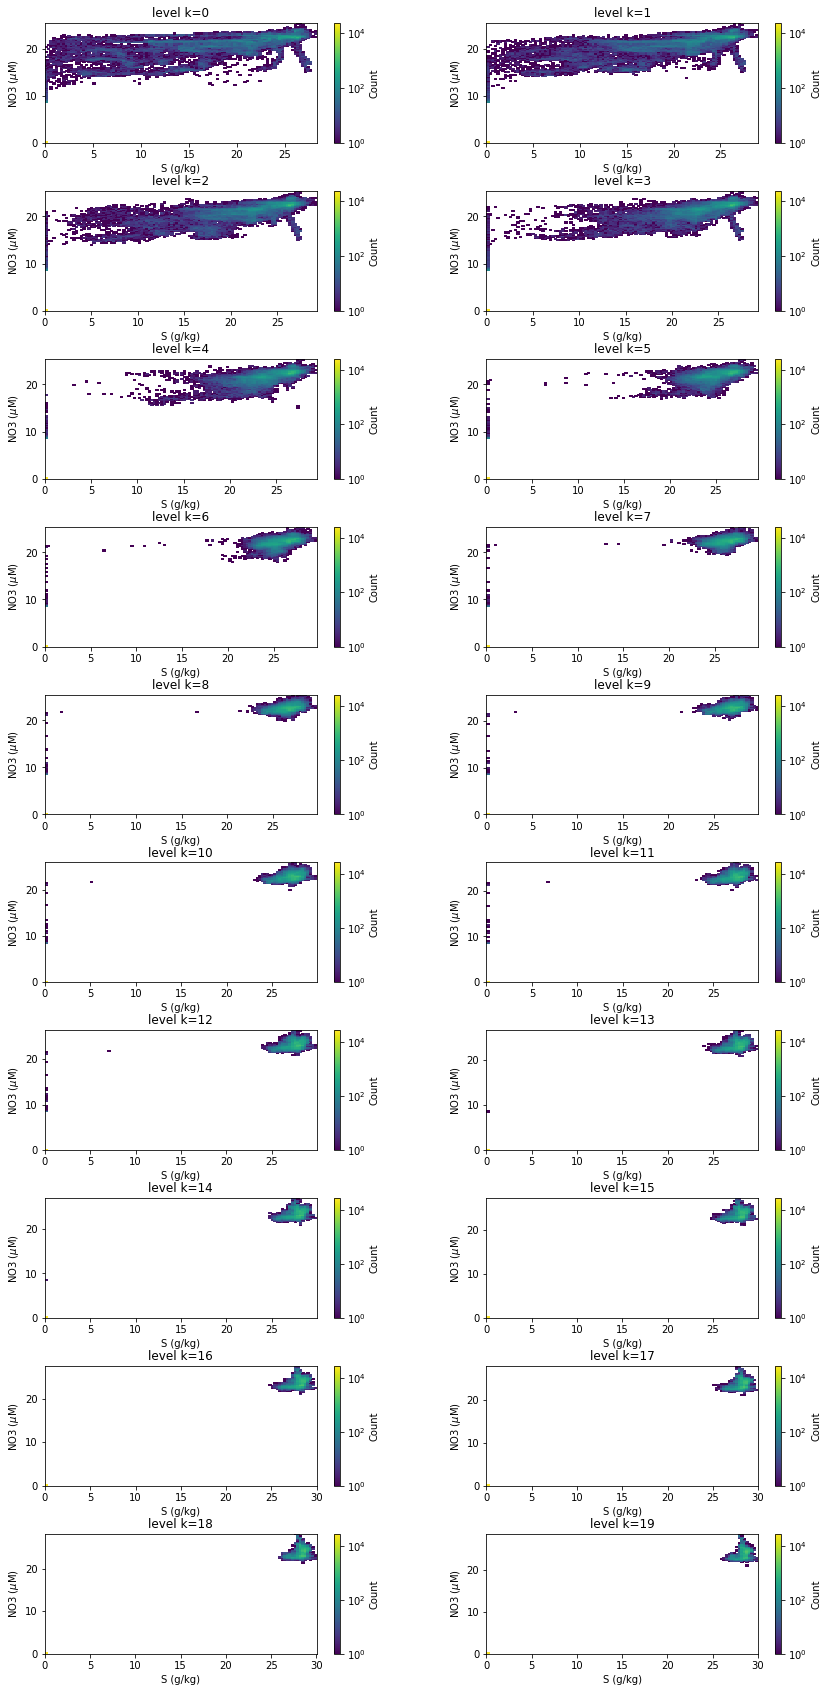

In [5]:
fig,ax=plt.subplots(10,2,figsize=(14,30))
fig.subplots_adjust(hspace=.4,wspace=.3)
ax=ax.flatten()
time=dt.datetime(2017,3,1,0,30)
with xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05') as f:
    with xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV19-05') as fT:
        for k in range(0,20):
            sal=np.array(fT.salinity.sel(time=dt.datetime(2017,7,1,0,30)).\
                         isel(depth=k,gridY=slice(j0,j1),gridX=slice(i0,i1)).values).flatten()
            no3=np.array(f.nitrate.sel(time=time).\
                         isel(depth=k,gridY=slice(j0,j1),gridX=slice(i0,i1)).values).flatten()
            counts, xedges, yedges, m1=ax[k].hist2d(sal[~np.isnan(sal)&~np.isnan(no3)],
                                                    no3[~np.isnan(sal)&~np.isnan(no3)],
                                                    bins=36*3,norm=LogNorm())
            cb=fig.colorbar(m1,ax=ax[k])
            cb.set_label('Count')
            ax[k].set_title('level k='+str(k))
            ax[k].set_xlabel('S (g/kg)')
            ax[k].set_ylabel('NO3 ($\mu$M)')
print('March 1')